In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('../input/solar-power-generation-data'):
    #for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import libraries und data files

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import warnings
warnings.filterwarnings("ignore")

In [3]:
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
generation_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


# Get overview of data

In [4]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
print(generation_data['SOURCE_KEY'].unique().size)
print(weather_data['SOURCE_KEY'].unique().size)

print(generation_data['PLANT_ID'].unique().size)
print(weather_data['PLANT_ID'].unique().size)

22
1
1
1


In [7]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


# Format datetime columns and merge Data Frames

In [8]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data["DATE_TIME"])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data["DATE_TIME"])

In [9]:
import pandas as pd

# ... (your existing code)

# Merge data
df = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)

# Set display options
pd.set_option('display.max_rows', None)  # Display all rows
# pd.set_option('display.max_columns', None)  # Uncomment this line if you want to display all columns

# Export the DataFrame to a CSV file
df.to_csv('merged_data.csv', index=False)
#dm.to_csv('merged_data.csv', index=False)

# Looking for null and missing values

In [10]:
df.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [11]:
df.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68774,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,3147.177450,307.778375,3295.834644,6.978728e+06,25.558521,31.244997,0.232305
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,2020-05-24 00:33:45,0.000000,0.000000,0.000000,6.512007e+06,22.724491,21.123944,0.000000
50%,2020-06-01 14:15:00,428.571429,41.450000,2658.473214,7.146685e+06,24.670178,24.818984,0.031620
75%,2020-06-09 20:00:00,6365.468750,623.561161,6274.000000,7.268751e+06,27.960429,41.693659,0.454880
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652
std,NaN,4036.441826,394.394865,3145.220597,4.162707e+05,3.361300,12.308283,0.301948


In [12]:
df.count()

DATE_TIME              68774
SOURCE_KEY             68774
DC_POWER               68774
AC_POWER               68774
DAILY_YIELD            68774
TOTAL_YIELD            68774
AMBIENT_TEMPERATURE    68774
MODULE_TEMPERATURE     68774
IRRADIATION            68774
dtype: int64

# Check for correlation of input fields

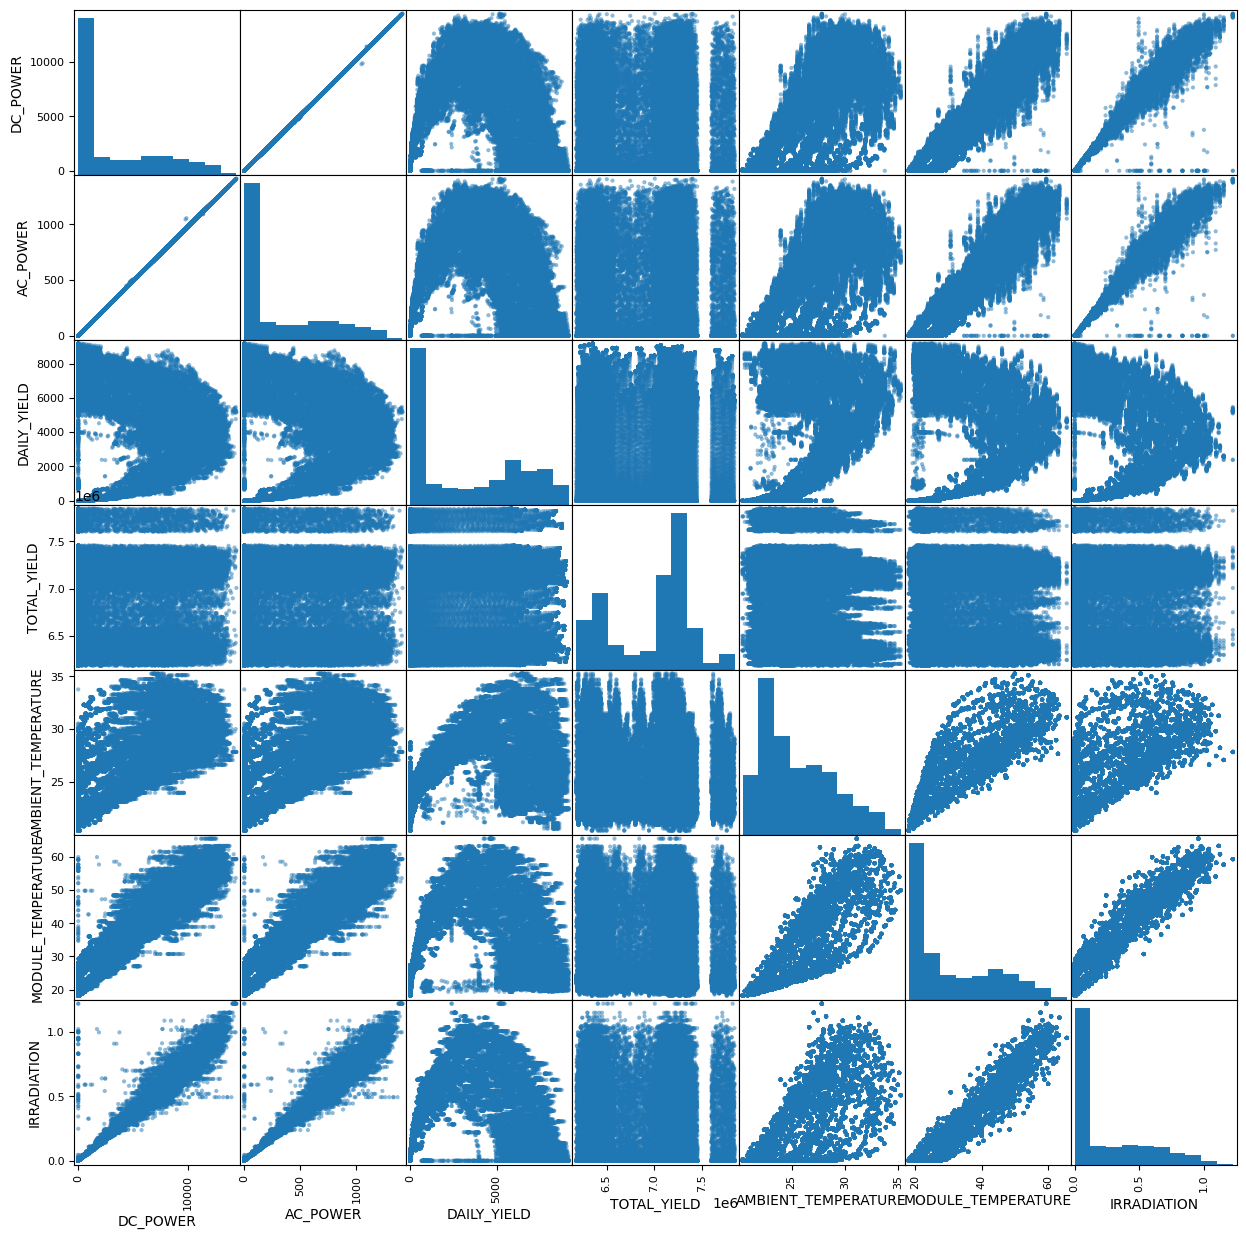

In [13]:
pd.plotting.scatter_matrix(df, figsize=(15,15))

plt.show()

In [14]:

corr = df.corr(numeric_only=True) # Add numeric_only=True to only include numerical columns in the correlation calculation
corr.style.background_gradient(cmap='coolwarm')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.000000,0.999996,0.082243,0.003851,0.724668,0.954811,0.989391
AC_POWER,0.999996,1.000000,0.082193,0.003840,0.724903,0.954924,0.989340
DAILY_YIELD,0.082243,0.082193,1.000000,0.009896,0.478496,0.198308,0.078317
TOTAL_YIELD,0.003851,0.003840,0.009896,1.000000,-0.036150,-0.015596,-0.005490
AMBIENT_TEMPERATURE,0.724668,0.724903,0.478496,-0.036150,1.000000,0.855420,0.725278
MODULE_TEMPERATURE,0.954811,0.954924,0.198308,-0.015596,0.855420,1.000000,0.961511
IRRADIATION,0.989391,0.989340,0.078317,-0.005490,0.725278,0.961511,1.000000


# Convert 'SOURCE_KEY' to numerical type

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df['SOURCE_KEY'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   SOURCE_KEY_NUMBER    68774 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory usage: 5.0+ MB


# Solar Power Prediction

### Preparation

In [16]:
#df_ml = df.copy()


In [17]:
from sklearn.model_selection import train_test_split
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER']

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
#scaler_y = MinMaxScaler()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)

# # Scale the target values
# y_train = scaler_y.fit_transform(y_train
# y_test = scaler_y.transform(y_test)


corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,DC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION
DC_POWER,1.000000,0.082243,0.003851,0.724668,0.989391
DAILY_YIELD,0.082243,1.000000,0.009896,0.478496,0.078317
TOTAL_YIELD,0.003851,0.009896,1.000000,-0.036150,-0.005490
AMBIENT_TEMPERATURE,0.724668,0.478496,-0.036150,1.000000,0.725278
IRRADIATION,0.989391,0.078317,-0.005490,0.725278,1.000000


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
merged_data = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Plot DC and AC Power Over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE_TIME'], merged_data['DC_POWER'], label='DC Power', color='blue', alpha=0.7)
plt.plot(merged_data['DATE_TIME'], merged_data['AC_POWER'], label='AC Power', color='orange', alpha=0.7)
plt.title('DC and AC Power Over Time')
plt.xlabel('Date Time')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Ambient and Module Temperature Over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE_TIME'], merged_data['AMBIENT_TEMPERATURE'], label='Ambient Temperature', color='green', alpha=0.7)
plt.plot(merged_data['DATE_TIME'], merged_data['MODULE_TEMPERATURE'], label='Module Temperature', color='red', alpha=0.7)
plt.title('Ambient and Module Temperature Over Time')
plt.xlabel('Date Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Irradiation Over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE_TIME'], merged_data['IRRADIATION'], label='Irradiation', color='purple', alpha=0.7)
plt.title('Irradiation Over Time')
plt.xlabel('Date Time')
plt.ylabel('Irradiation')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot to Identify Extreme Values
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']])
plt.title('Distribution of Power, Temperature, and Irradiation')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf = LinearRegression()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate performance metrics for regression
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results for the training and test sets
print(f'Random Forest Mean Squared Error on Training Set: {mse_train:.2f}')
print(f'Random Forest Mean Squared Error on Testing Set: {mse_test:.2f}')
print(f'Random Forest R² Score on Training Set: {r2_train:.2f}')
print(f'Random Forest R² Score on Testing Set: {r2_test:.2f}')


## K-NN

Best n_neighbors: 20 with R² score: 0.1611


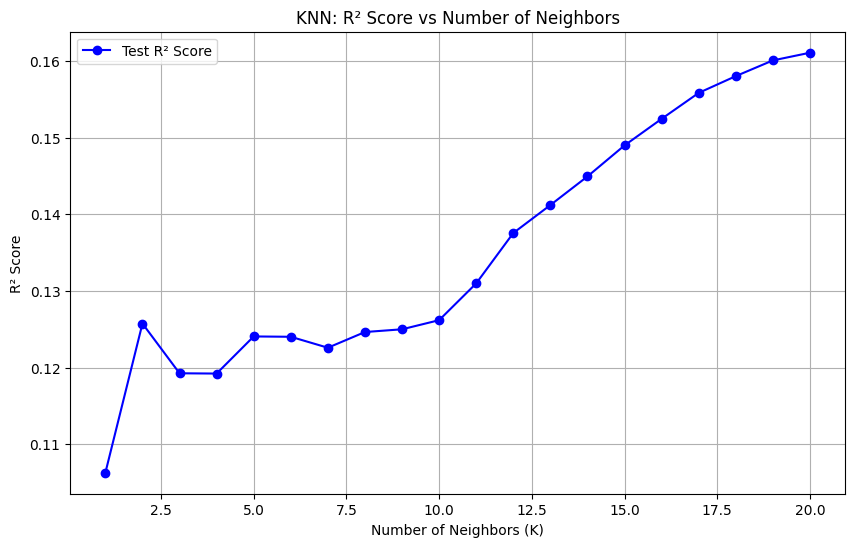

    n_neighbors    MSE_train  RMSE_train  MAE_train  R²_train       MSE_test  \
0             1  5909.604137   76.873950  26.967770  0.963237  119710.224199   
1             2  2894.375442   53.799400  20.285951  0.981995  117104.058976   
2             3  2616.141777   51.148233  19.193323  0.983725  117973.119538   
3             4  2464.057075   49.639269  18.660467  0.984671  117977.820616   
4             5  2273.289029   47.679021  17.711381  0.985858  117329.405862   
5             6  2260.862617   47.548529  17.594266  0.985936  117335.196929   
6             7  2272.693155   47.672772  17.616582  0.985862  117526.746604   
7             8  2225.082595   47.170781  17.304722  0.986158  117252.280069   
8             9  2215.761177   47.071872  17.183418  0.986216  117204.417977   
9            10  2170.048111   46.583775  16.955686  0.986500  117045.207387   
10           11  2176.460436   46.652550  17.103306  0.986461  116402.790314   
11           12  2198.259773   46.885603

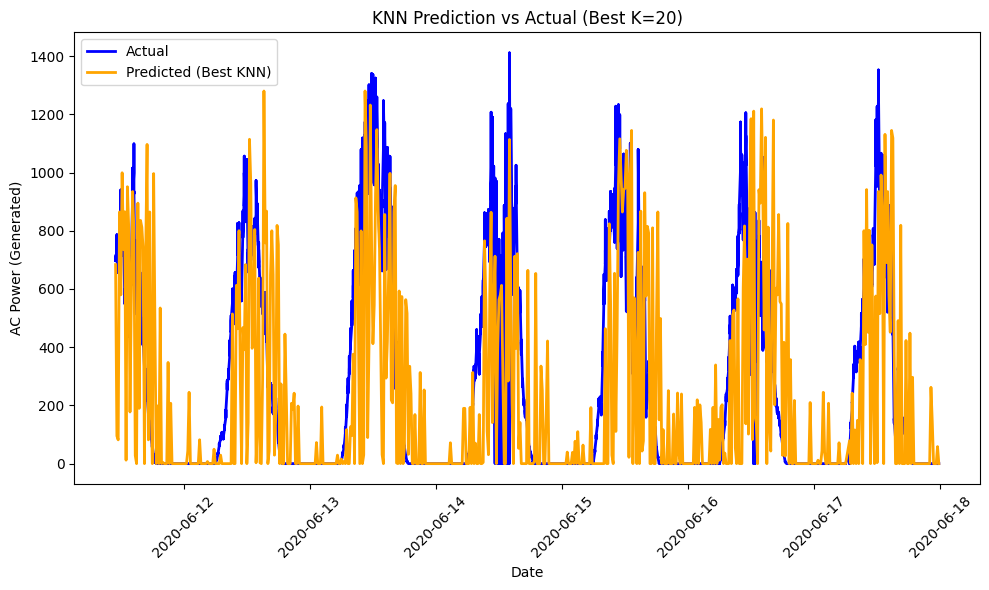

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Select necessary columns for analysis
# Assuming 'AC_POWER' represents solar energy generated and 'AMBIENT_TEMPERATURE' as a feature
df = df[['DATE_TIME', 'AC_POWER', 'AMBIENT_TEMPERATURE']]

# Handle missing data if any (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['AMBIENT_TEMPERATURE']].values  # You can add more features if necessary
y = df['AC_POWER'].values  # Assuming 'AC_POWER' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize lists to store the metrics
score_list = []
n_neighbors_list = []
metrics = []

# Loop through a range of n_neighbors values (1 to 20)
for i in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    # Predicting on the test and training sets
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)

    # Calculating performance metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculating performance metrics for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Collecting metrics for both training and test sets
    metrics.append({
        'n_neighbors': i,
        'MSE_train': mse_train,
        'RMSE_train': rmse_train,
        'MAE_train': mae_train,
        'R²_train': r2_train,
        'MSE_test': mse_test,
        'RMSE_test': rmse_test,
        'MAE_test': mae_test,
        'R²_test': r2_test
    })

    # Collecting R² score for comparison (for the test set)
    score_list.append(r2_test)
    n_neighbors_list.append(i)

# Convert metrics to a DataFrame for easier analysis
metrics_df = pd.DataFrame(metrics)

# Display the best n_neighbors value based on the highest R² score on the test set
best_n_neighbors = n_neighbors_list[np.argmax(score_list)]
print(f'Best n_neighbors: {best_n_neighbors} with R² score: {max(score_list):.4f}')

# Plot the R² score for different n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, score_list, marker='o', linestyle='-', color='b', label='Test R² Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.title('KNN: R² Score vs Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()

# Display the metrics DataFrame for further insights
print(metrics_df)

# Plot the actual vs predicted for the best n_neighbors
knn_best = KNeighborsRegressor(n_neighbors=best_n_neighbors)
knn_best.fit(X_train, y_train)

# Make predictions on the test set with the best model
y_test_pred_best = knn_best.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(df['DATE_TIME'][-len(y_test):], y_test, label='Actual', color='blue', linewidth=2)
plt.plot(df['DATE_TIME'][-len(y_test):], y_test_pred_best, label='Predicted (Best KNN)', color='orange', linewidth=2)
plt.xlabel('Date')
plt.ylabel('AC Power (Generated)')
plt.title(f'KNN Prediction vs Actual (Best K={best_n_neighbors})')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Training Set Metrics:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R² Score: 100.0000%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0066
Mean Squared Error (MSE): 0.0002
Root Mean Squared Error (RMSE): 0.0138
R² Score: 99.7155%


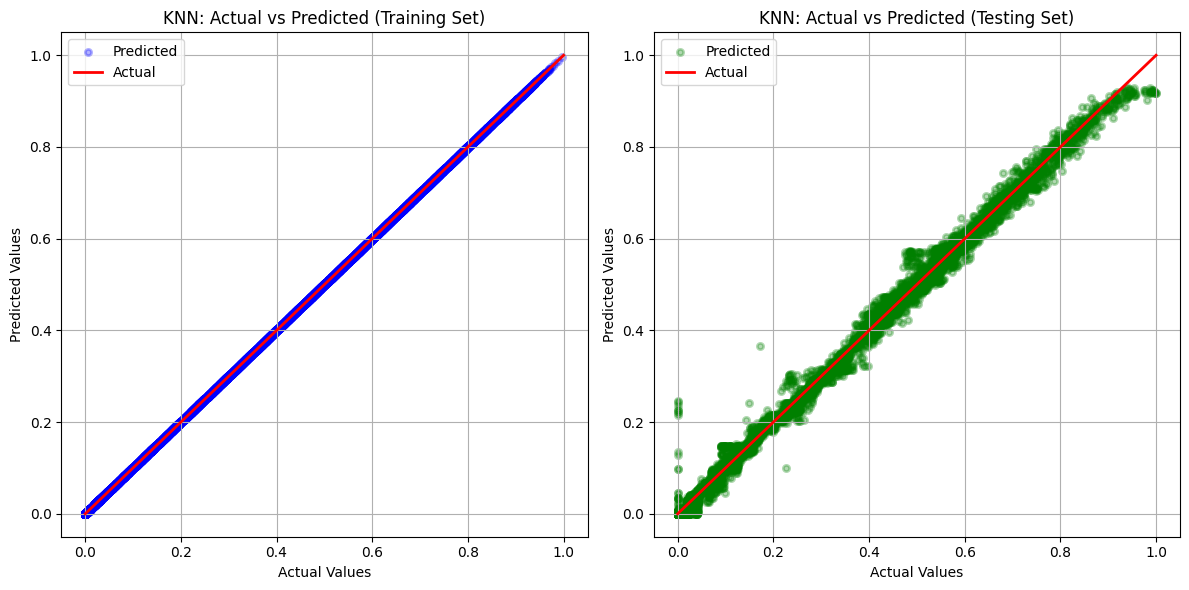

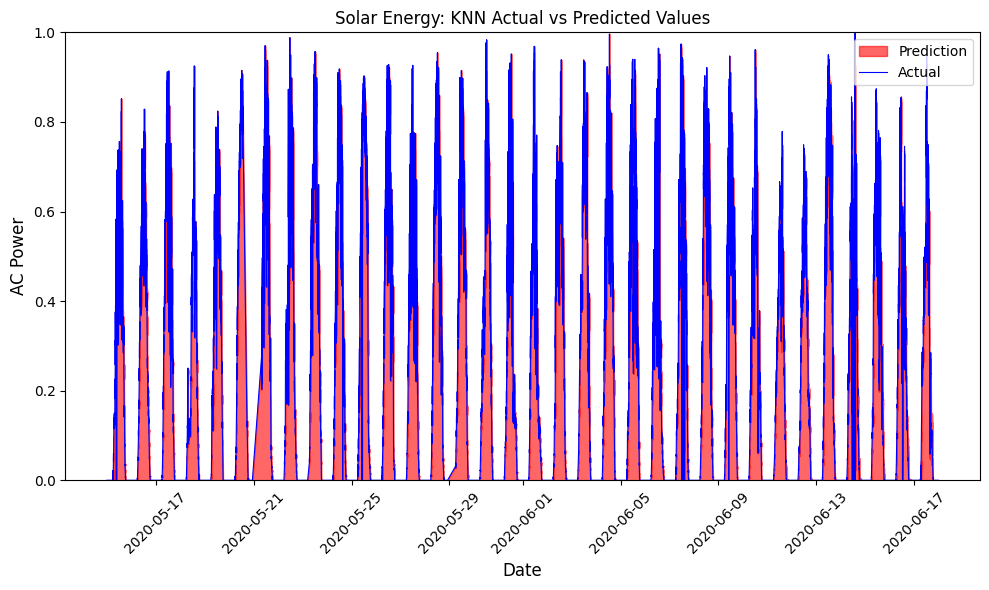

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values.reshape(-1, 1)  # Reshape to 2D for scaler

# Feature Scaling (Min-Max Normalization to range 0-1)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)  # Scale y to 0-1 range

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Initialize and fit the KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(X_train, y_train.ravel())  # Flatten y_train to 1D

# Make predictions on the training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate performance metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train * 100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test * 100:.4f}%')

# Plotting the Actual vs Prediction for both training and test sets
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')  # Line from (0,0) to (1,1)
plt.title('KNN: Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Testing set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')
plt.title('KNN: Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Plot the prediction vs actual over time (Scaled)
plt.figure(figsize=(10, 6))
plt.fill_between(df['DATE_TIME'], np.concatenate([y_train_pred, y_test_pred]), color='red', label='Prediction', alpha=0.6)
plt.plot(df['DATE_TIME'], np.concatenate([y_train, y_test]), color='blue', label='Actual', linewidth=0.8)

# Add labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('AC Power', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.ylim([0, 1])  # Ensure y-axis is from 0 to 1
plt.title('Solar Energy: KNN Actual vs Predicted Values')

# Format the x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


Cross-Validation Results (KNN with k=5 folds):
Mean Absolute Error (MAE): 0.0044 ± 0.0001
Mean Squared Error (MSE): 0.0001 ± 0.0000
R² Score: 99.8998% ± 0.0049%


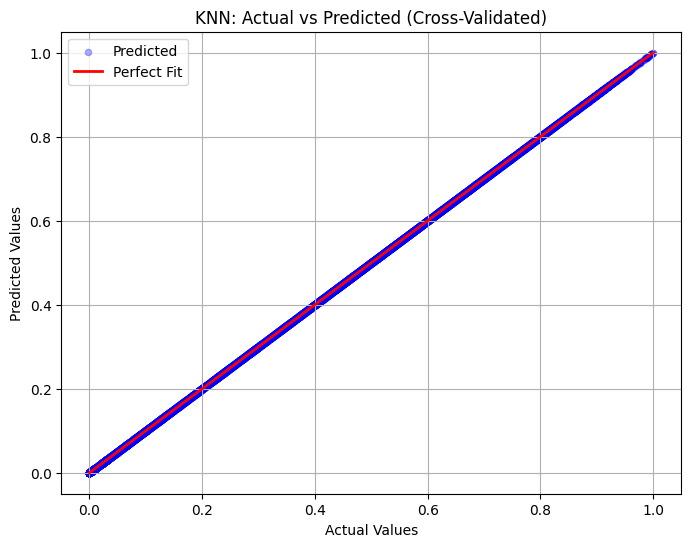

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values.reshape(-1, 1)  # Reshape for MinMaxScaler

# Feature Scaling (Min-Max Normalization to 0-1 range)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).ravel()  # Flatten to 1D

# k-Fold Cross-Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize KNN model
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')

# Perform Cross-Validation and Get Scores
mae_scores = -cross_val_score(knn, X_scaled, y_scaled, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(knn, X_scaled, y_scaled, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_scaled, y_scaled, cv=kf, scoring='r2')

# Print Cross-Validation Results (Average Across Folds)
print(f'Cross-Validation Results (KNN with k={kf.n_splits} folds):')
print(f'Mean Absolute Error (MAE): {mae_scores.mean():.4f} ± {mae_scores.std():.4f}')
print(f'Mean Squared Error (MSE): {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'R² Score: {r2_scores.mean() * 100:.4f}% ± {r2_scores.std() * 100:.4f}%')

# Train on Full Dataset and Predict
knn.fit(X_scaled, y_scaled)
y_pred = knn.predict(X_scaled)

# Plot the Actual vs Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_scaled, y_pred, color='blue', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Perfect Fit')  # Reference line
plt.title('KNN: Actual vs Predicted (Cross-Validated)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


## Decision Tree

Training Set Metrics:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R² Score: 100.0000%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.1596
Mean Squared Error (MSE): 0.4599
Root Mean Squared Error (RMSE): 0.6782
R² Score: 99.9997%


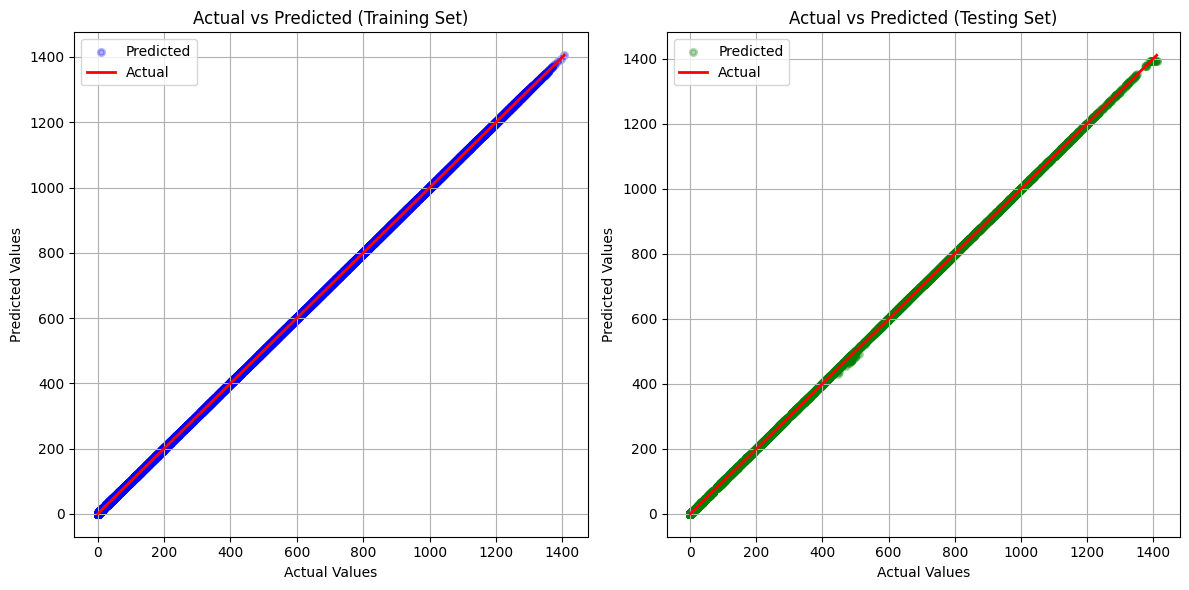

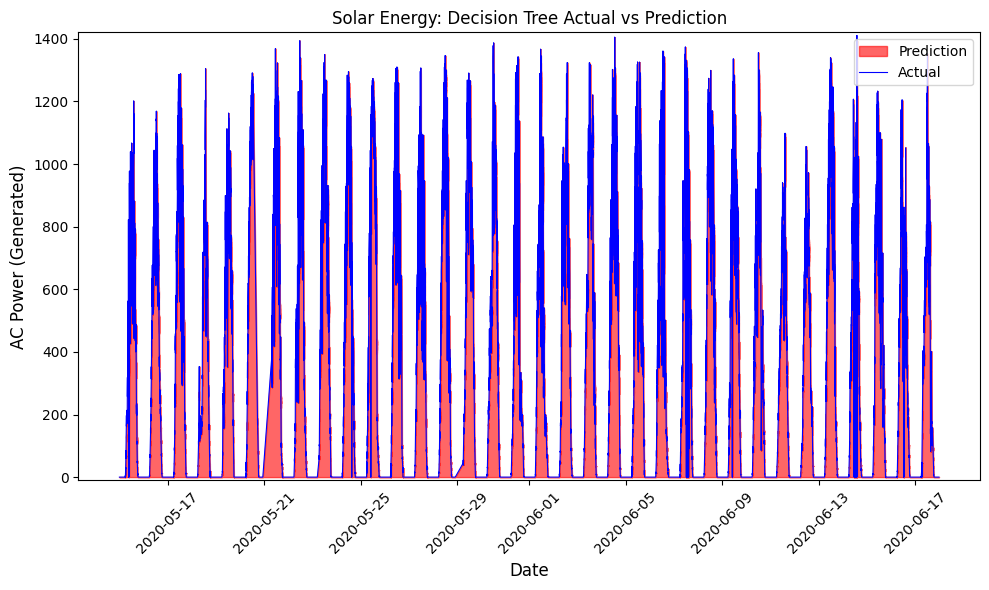

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Select necessary columns for analysis
# Assuming 'AC_POWER' (or similar) represents solar energy generated and 'AMBIENT_TEMPERATURE' as a feature
#df = df[['DATE_TIME', 'AC_POWER', 'AMBIENT_TEMPERATURE']]

# Handle missing data if any (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values  # Assuming 'AC_POWER' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the XGBRegressor
xgb = DecisionTreeRegressor()
xgb.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate performance metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train * 100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test * 100:.4f}%')

# Plotting the Actual vs Prediction for both training and test sets
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Testing set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Plot the prediction vs actual over time
plt.figure(figsize=(10, 6))
plt.fill_between(df['DATE_TIME'], np.concatenate([y_train_pred, y_test_pred]), color='red', label='Prediction', alpha=0.6)
plt.plot(df['DATE_TIME'], df['AC_POWER'], color='blue', label='Actual', linewidth=0.8)

# Add labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('AC Power (Generated)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.ylim([-10, max(df['AC_POWER']) + 10])
plt.title('Solar Energy: Decision Tree Actual vs Prediction')

# Format the x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


Training Set Metrics:
MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000, R²: 100.0000%
Testing Set Metrics:
MAE: 0.0001, MSE: 0.0000, RMSE: 0.0006, R²: 99.9995%


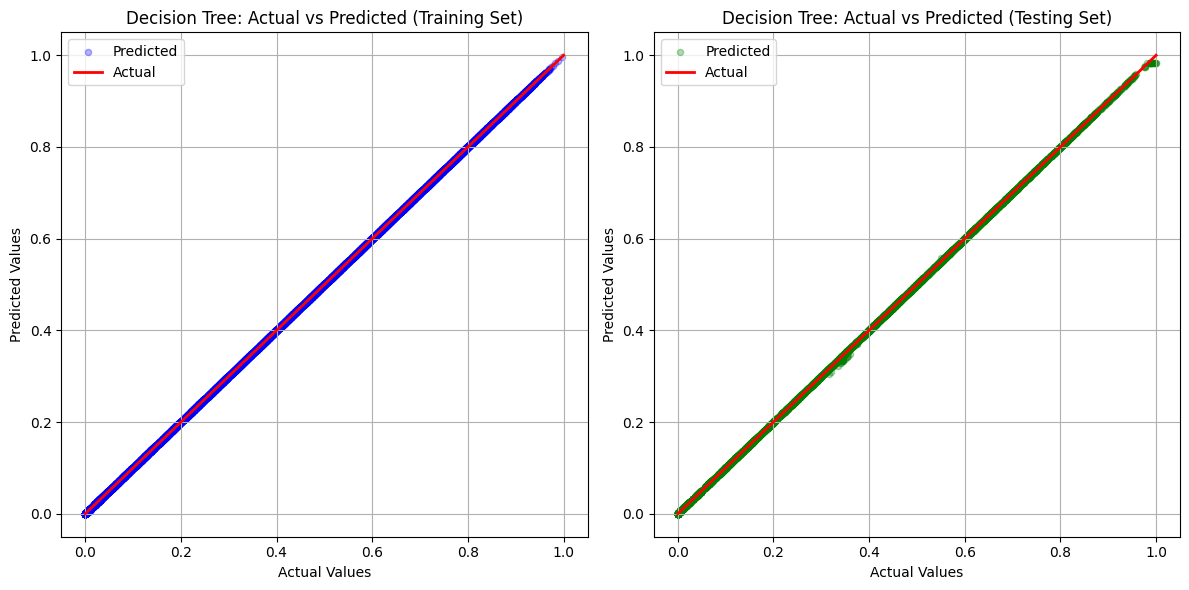

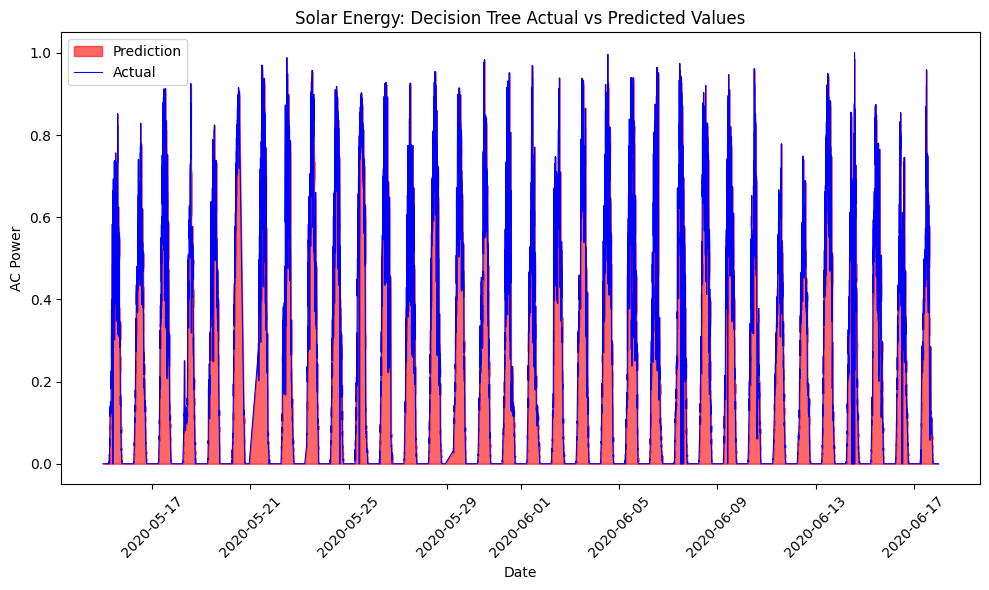

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data if any (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df[['AC_POWER']]

# Apply MinMax Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Initialize and fit the DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate performance metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f'Training Set Metrics:')
print(f'MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train * 100:.4f}%')
print(f'Testing Set Metrics:')
print(f'MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test * 100:.4f}%')

# Plotting Actual vs Prediction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')
plt.title('Decision Tree: Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')
plt.title('Decision Tree: Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot Prediction vs Actual Over Time
plt.figure(figsize=(10, 6))
plt.fill_between(df['DATE_TIME'], np.concatenate([y_train_pred, y_test_pred]), color='red', label='Prediction', alpha=0.6)
plt.plot(df['DATE_TIME'], y_scaled, color='blue', label='Actual', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('AC Power')
plt.legend()
plt.title('Solar Energy: Decision Tree Actual vs Predicted Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cross-Validation Results (Decision Tree with k=5 folds):
Mean Absolute Error (MAE): 0.0001 ± 0.0000
Mean Squared Error (MSE): 0.0000 ± 0.0000
R² Score: 99.9996% ± 0.0003%


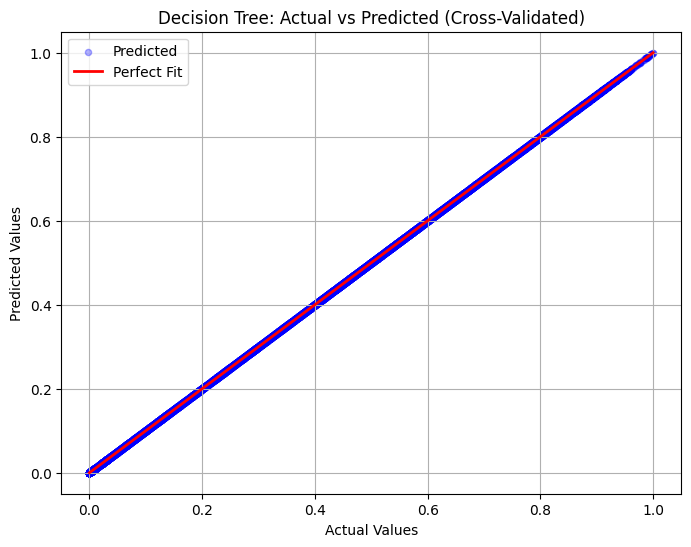

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data if any (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df[['AC_POWER']]

# Apply MinMax Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# k-Fold Cross-Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Perform Cross-Validation and Get Scores
mae_scores = -cross_val_score(model, X_scaled, y_scaled, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X_scaled, y_scaled, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_scaled, y_scaled, cv=kf, scoring='r2')

# Print Cross-Validation Results (Average Across Folds)
print(f'Cross-Validation Results (Decision Tree with k={kf.n_splits} folds):')
print(f'Mean Absolute Error (MAE): {mae_scores.mean():.4f} ± {mae_scores.std():.4f}')
print(f'Mean Squared Error (MSE): {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'R² Score: {r2_scores.mean() * 100:.4f}% ± {r2_scores.std() * 100:.4f}%')

# Train on Full Dataset and Predict
model.fit(X_scaled, y_scaled)
y_pred = model.predict(X_scaled)

# Plot the Actual vs Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_scaled, y_pred, color='blue', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Perfect Fit')  # Reference line
plt.title('Decision Tree: Actual vs Predicted (Cross-Validated)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Cross-validated R² scores (Training): [0.99998984 0.99999917 0.99999487 0.99999488 0.99999847]
Mean R² (Training): 99.9995%

Cross-validated R² scores (Testing): [0.99999744 0.99999523 0.99999643 0.99999747 0.99999746]
Mean R² (Testing): 99.9997%

Training Set Metrics:
MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000, R²: 100.0000%

Testing Set Metrics:
MAE: 0.1551, MSE: 0.4155, RMSE: 0.6446, R²: 99.9997%


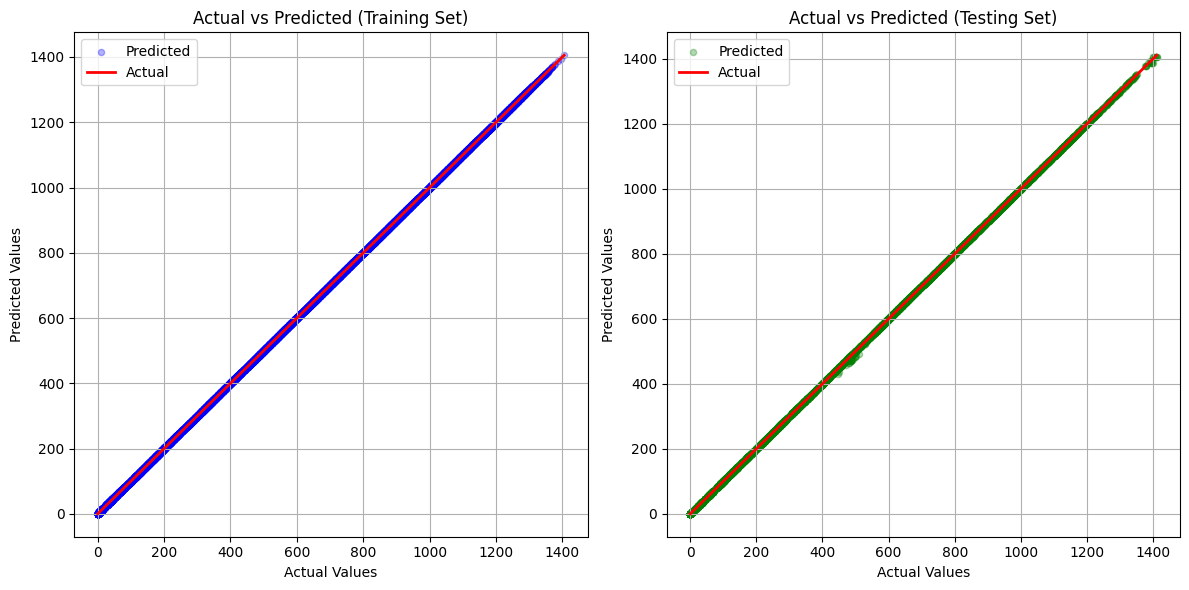

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge datasets
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing values (forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values  # Target variable

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the dataset

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Initialize Decision Tree Regressor
dr = DecisionTreeRegressor()

# Perform cross-validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores_train = cross_val_score(dr, X_train, y_train, cv=cv, scoring='r2')
r2_scores_test = cross_val_score(dr, X_test, y_test, cv=cv, scoring='r2')

# Fit the model
dr.fit(X_train, y_train)

# Make predictions
y_train_pred = dr.predict(X_train)
y_test_pred = dr.predict(X_test)

# Performance metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Performance metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print cross-validation results
print(f'Cross-validated R² scores (Training): {r2_scores_train}')
print(f'Mean R² (Training): {np.mean(r2_scores_train)*100:.4f}%')

print(f'\nCross-validated R² scores (Testing): {r2_scores_test}')
print(f'Mean R² (Testing): {np.mean(r2_scores_test)*100:.4f}%')

# Print results for training and test sets
print(f'\nTraining Set Metrics:')
print(f'MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train*100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test*100:.4f}%')

# Plot for Training set
plt.figure(figsize=(12, 6))

# Training set actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Testing set actual vs predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Training Set Metrics:
Mean Absolute Error (MAE): 0.0494
Mean Squared Error (MSE): 0.0729
Root Mean Squared Error (RMSE): 0.2699
R² Score: 100.0000%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.1289
Mean Squared Error (MSE): 0.4549
Root Mean Squared Error (RMSE): 0.6745
R² Score: 99.9997%


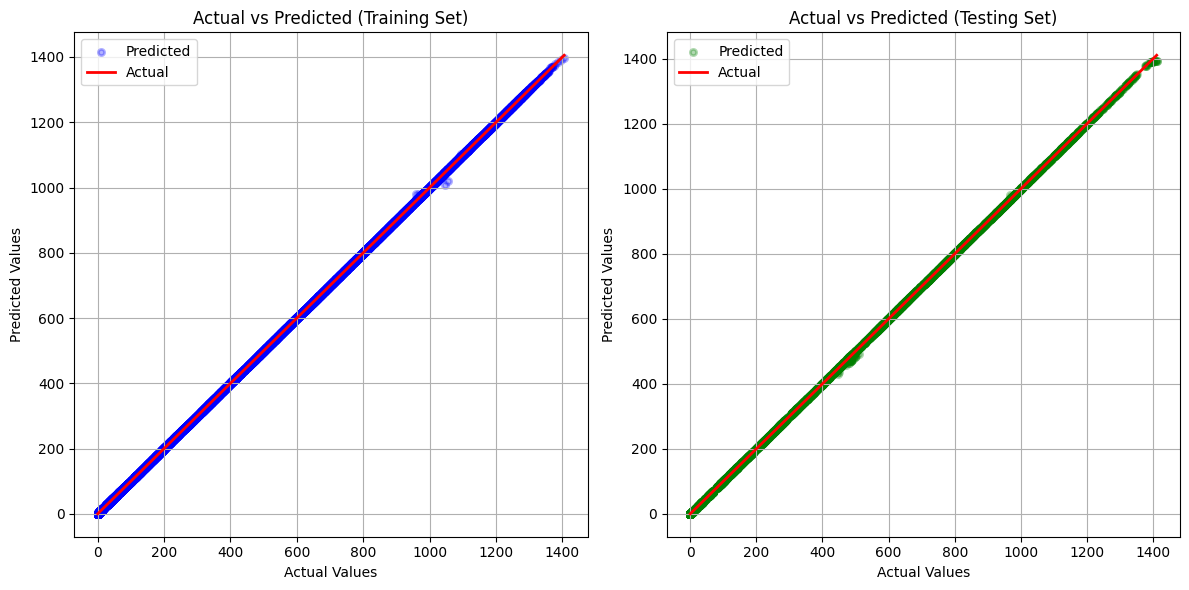

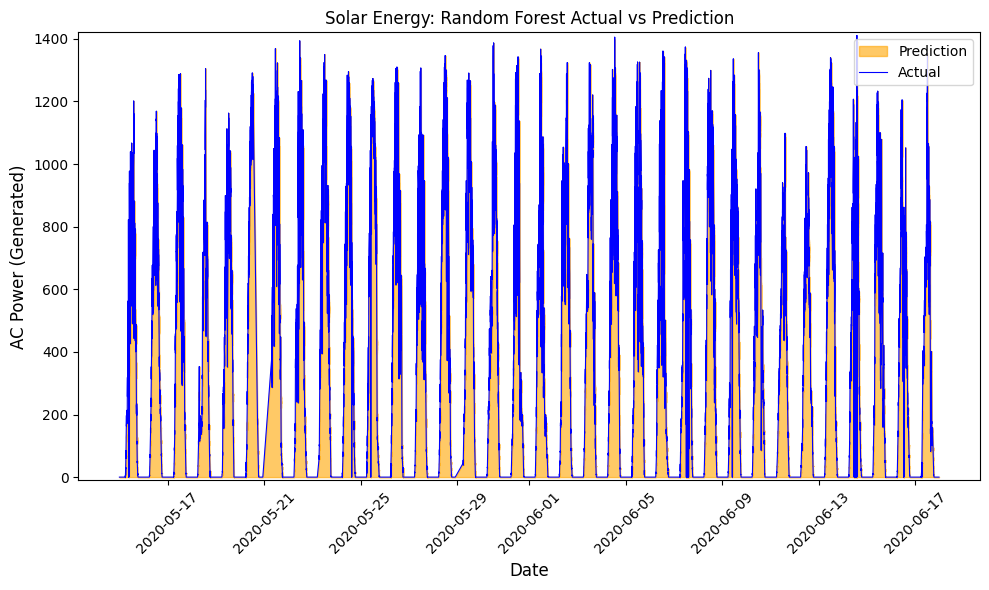

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Select necessary columns for analysis
# Assuming 'AC_POWER' (or similar) represents solar energy generated and 'AMBIENT_TEMPERATURE' as a feature
#df = df[['DATE_TIME', 'AC_POWER', 'AMBIENT_TEMPERATURE']]

# Handle missing data if any (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values  # Assuming 'AC_POWER' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the XGBRegressor
xgb = RandomForestRegressor()
xgb.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate performance metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train * 100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test * 100:.4f}%')

# Plotting the Actual vs Prediction for both training and test sets
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Testing set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Plot the prediction vs actual over time
plt.figure(figsize=(10, 6))
plt.fill_between(df['DATE_TIME'], np.concatenate([y_train_pred, y_test_pred]), color='orange', label='Prediction', alpha=0.6)
plt.plot(df['DATE_TIME'], df['AC_POWER'], color='blue', label='Actual', linewidth=0.8)

# Add labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('AC Power (Generated)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.ylim([-10, max(df['AC_POWER']) + 10])
plt.title('Solar Energy: Random Forest Actual vs Prediction')

# Format the x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


Training Set Metrics:
MAE: 0.0000348, MSE: 0.0000000, RMSE: 0.0001697, R²: 0.9999996

Testing Set Metrics:
MAE: 0.0000914, MSE: 0.0000002, RMSE: 0.0004830, R²: 0.9999965


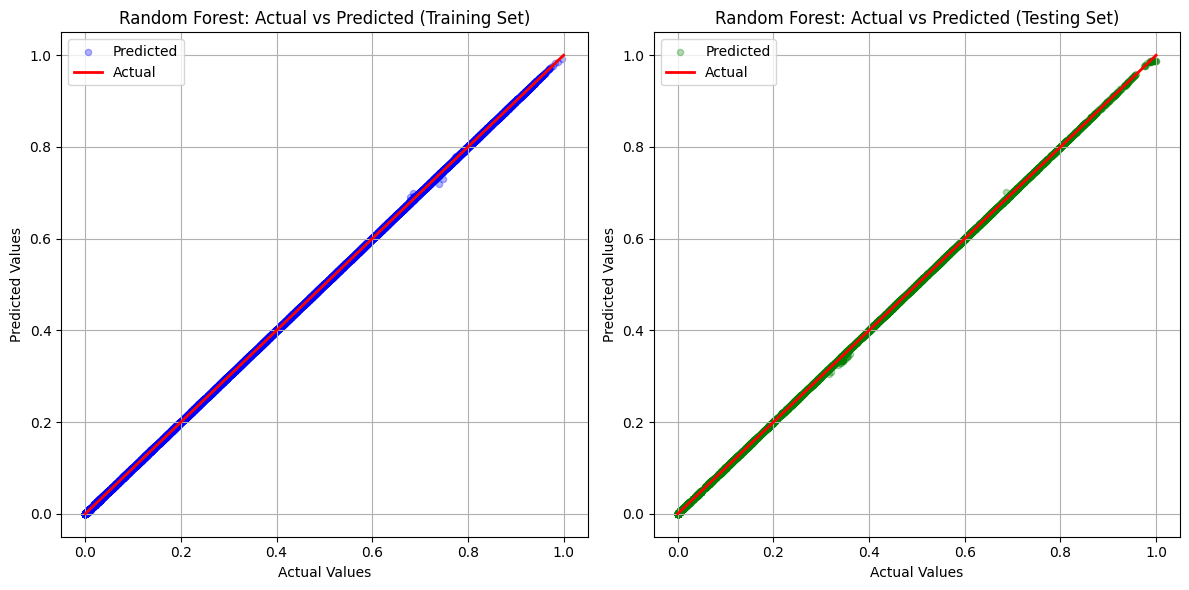

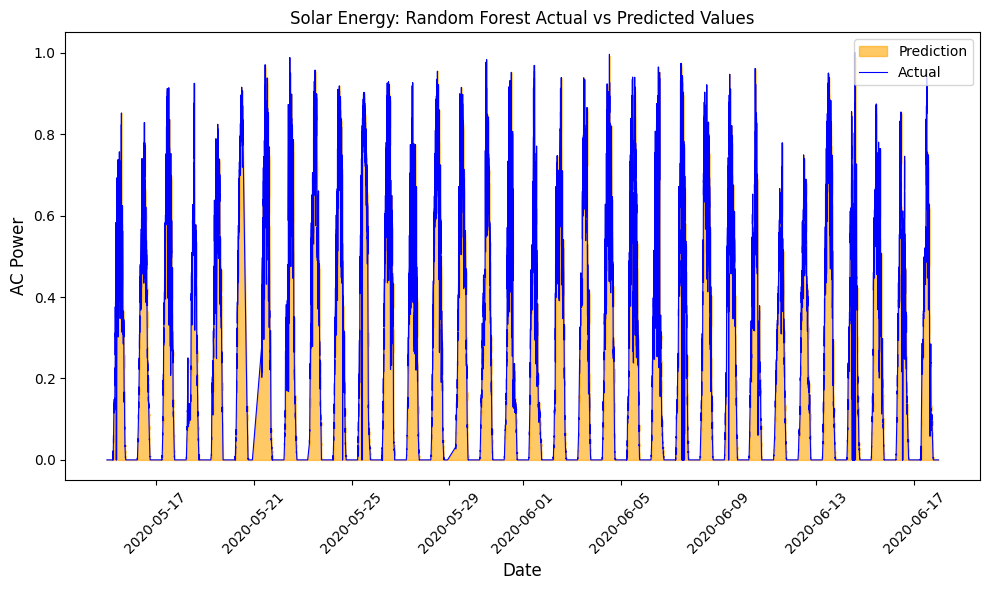

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data if any (forward fill)
df.fillna(method='ffill', inplace=True)

# Select features and target variable
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values  # Target variable

# Apply MinMaxScaler to scale values between 0 and 1
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Initialize and fit the RandomForestRegressor
xgb = RandomForestRegressor()
xgb.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate performance metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f'Training Set Metrics:')
print(f'MAE: {mae_train:.7f}, MSE: {mse_train:.7f}, RMSE: {rmse_train:.7f}, R²: {r2_train:.7f}')

print(f'\nTesting Set Metrics:')
print(f'MAE: {mae_test:.7f}, MSE: {mse_test:.7f}, RMSE: {rmse_test:.7f}, R²: {r2_test:.7f}')

# Plot Actual vs Prediction for scaled data
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')
plt.title('Random Forest: Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Testing set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')
plt.title('Random Forest: Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot scaled predictions over time
plt.figure(figsize=(10, 6))
plt.fill_between(df['DATE_TIME'], np.concatenate([y_train_pred, y_test_pred]), color='orange', label='Prediction', alpha=0.6)
plt.plot(df['DATE_TIME'], y_scaled, color='blue', label='Actual', linewidth=0.8)

plt.xlabel('Date', fontsize=12)
plt.ylabel('AC Power', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.title('Solar Energy: Random Forest Actual vs Predicted Values')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cross-Validation Results (Random Forest with k=5 folds):
Mean Absolute Error (MAE): 0.0001 ± 0.0000
Mean Squared Error (MSE): 0.0000 ± 0.0000
R² Score: 99.9997% ± 0.0003%


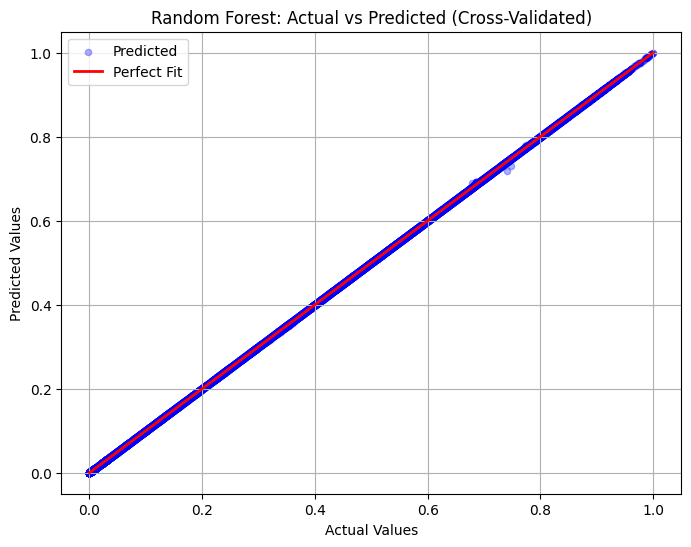

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data if any (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df[['AC_POWER']]

# Apply MinMax Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# k-Fold Cross-Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform Cross-Validation and Get Scores
mae_scores = -cross_val_score(model, X_scaled, y_scaled.ravel(), cv=kf, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(model, X_scaled, y_scaled.ravel(), cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_scaled, y_scaled.ravel(), cv=kf, scoring='r2')

# Print Cross-Validation Results (Average Across Folds)
print(f'Cross-Validation Results (Random Forest with k={kf.n_splits} folds):')
print(f'Mean Absolute Error (MAE): {mae_scores.mean():.4f} ± {mae_scores.std():.4f}')
print(f'Mean Squared Error (MSE): {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'R² Score: {r2_scores.mean() * 100:.4f}% ± {r2_scores.std() * 100:.4f}%')

# Train on Full Dataset and Predict
model.fit(X_scaled, y_scaled.ravel())
y_pred = model.predict(X_scaled)

# Plot the Actual vs Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_scaled, y_pred, color='blue', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Perfect Fit')  # Reference line
plt.title('Random Forest: Actual vs Predicted (Cross-Validated)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Training Set Metrics:
Mean Absolute Error (MAE): 0.6335
Mean Squared Error (MSE): 1.1697
Root Mean Squared Error (RMSE): 1.0815
R² Score: 99.9993%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.8213
Mean Squared Error (MSE): 8.9549
Root Mean Squared Error (RMSE): 2.9925
R² Score: 99.9933%


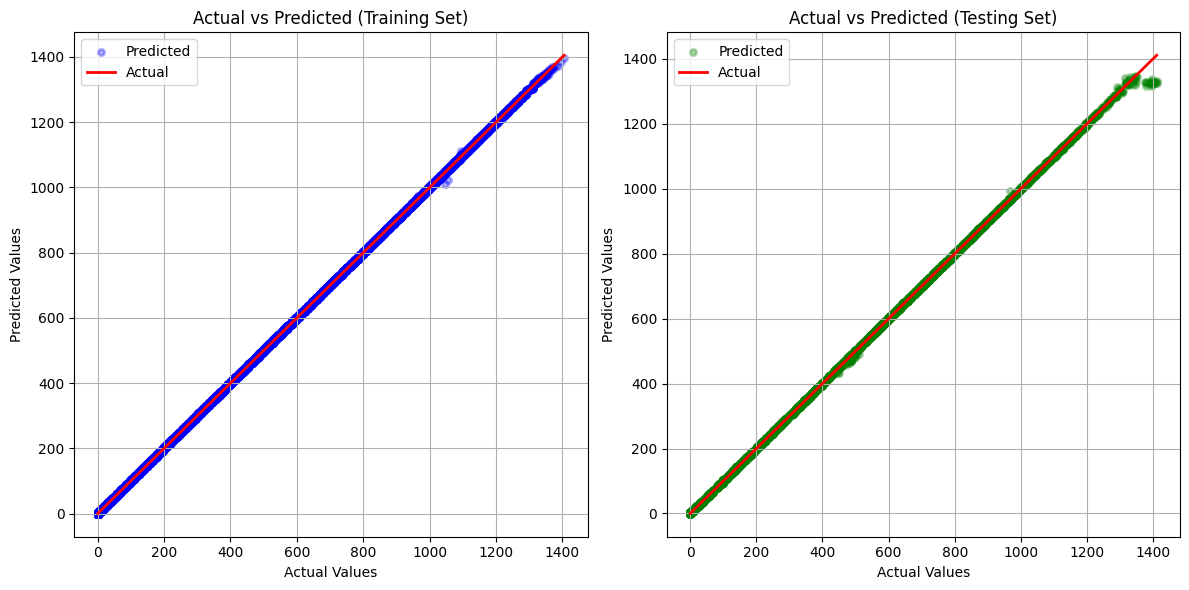

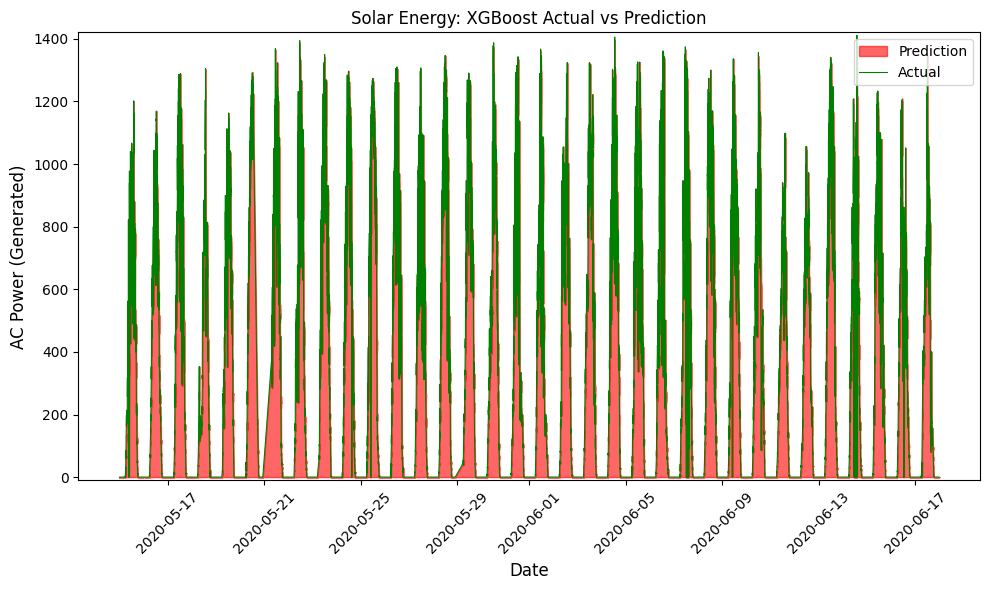

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Select necessary columns for analysis
# Assuming 'AC_POWER' (or similar) represents solar energy generated and 'AMBIENT_TEMPERATURE' as a feature
#df = df[['DATE_TIME', 'AC_POWER', 'AMBIENT_TEMPERATURE']]

# Handle missing data if any (for simplicity, forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values  # Assuming 'AC_POWER' is the target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and fit the XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate performance metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train * 100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test * 100:.4f}%')

# Plotting the Actual vs Prediction for both training and test sets
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Testing set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Plot the prediction vs actual over time
plt.figure(figsize=(10, 6))
plt.fill_between(df['DATE_TIME'], np.concatenate([y_train_pred, y_test_pred]), color='red', label='Prediction', alpha=0.6)
plt.plot(df['DATE_TIME'], df['AC_POWER'], color='green', label='Actual', linewidth=0.8)

# Add labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('AC Power (Generated)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.ylim([-10, max(df['AC_POWER']) + 10])
plt.title('Solar Energy: XGBoost Actual vs Prediction')

# Format the x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


Training Set Metrics:
Mean Absolute Error (MAE): 0.0005
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0009
R² Score: 99.9991%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0006
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0022
R² Score: 99.9930%


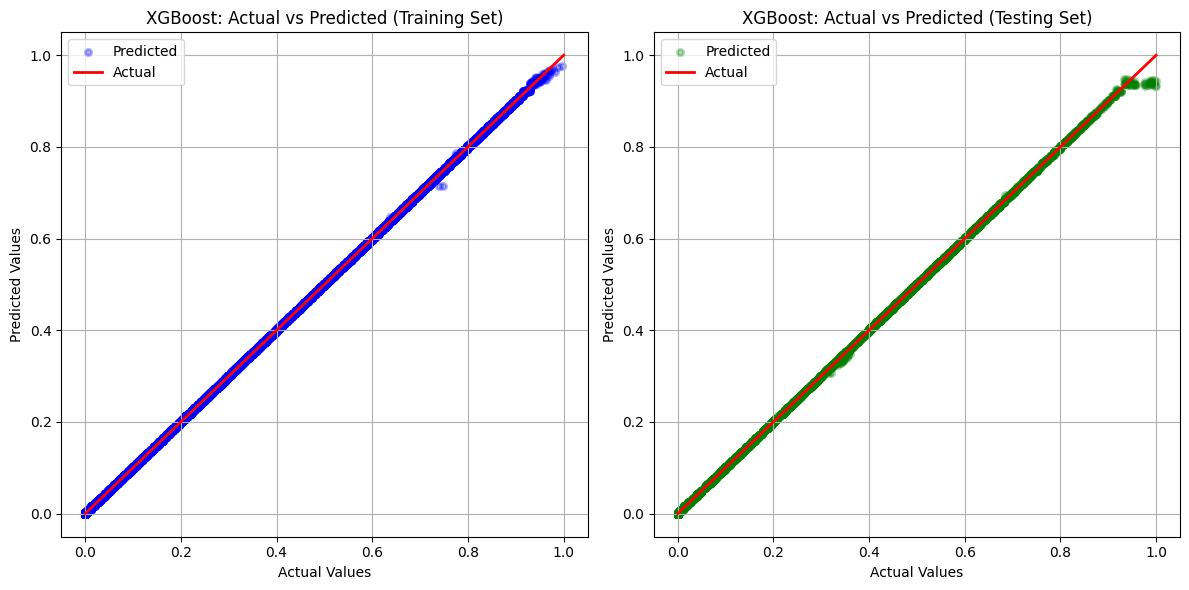

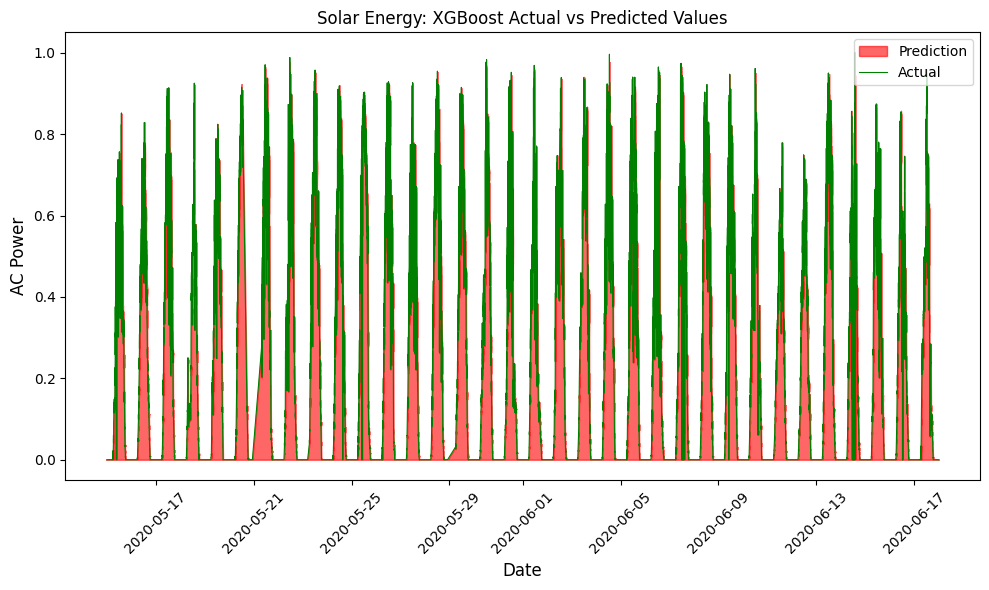

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data (forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER'].values.reshape(-1, 1)  # Ensure y is a 2D array for scaling

# Apply MinMaxScaler to scale features and target between 0 and 1
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)  # Scale target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Initialize and fit the XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train.ravel())  # Flatten y_train

# Make predictions on the training and test sets
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate performance metrics for the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train * 100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test * 100:.4f}%')

# Plotting the Actual vs Prediction for both training and test sets
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')  # Line from (0,0) to (1,1)
plt.title('XGBoost: Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Testing set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', lw=2, alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Actual')
plt.title('XGBoost: Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Plot the prediction vs actual over time (scaled values)
plt.figure(figsize=(10, 6))
plt.fill_between(df['DATE_TIME'], np.concatenate([y_train_pred, y_test_pred]), color='red', label='Prediction', alpha=0.6)
plt.plot(df['DATE_TIME'], scaler_y.transform(df['AC_POWER'].values.reshape(-1, 1)), color='green', label='Actual', linewidth=0.8)

# Add labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('AC Power', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.title('Solar Energy: XGBoost Actual vs Predicted Values')

# Format the x-axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


Cross-Validation Results (XGBoost with k=5 folds):
Mean Absolute Error (MAE): 0.0005 ± 0.0000
Mean Squared Error (MSE): 0.0000 ± 0.0000
R² Score: 99.9982% ± 0.0005%


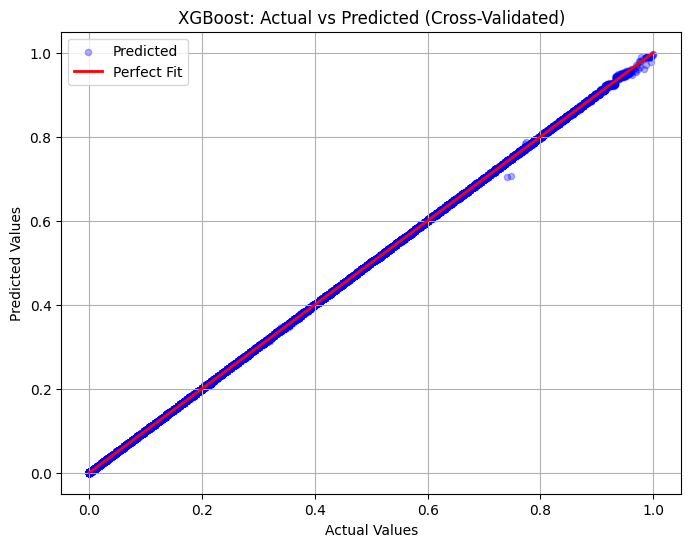

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load datasets
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Convert 'DATE_TIME' to datetime in both datasets
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

# Merge the datasets on 'DATE_TIME'
df = pd.merge(generation_data, weather_data, on='DATE_TIME')

# Handle missing data (forward fill)
df.fillna(method='ffill', inplace=True)

# Features (X) and Target (y)
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df[['AC_POWER']].values  # Ensure y is a 2D array

# Apply MinMaxScaler to scale features and target between 0 and 1
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).ravel()  # Flatten for XGBoost compatibility

# k-Fold Cross-Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Perform Cross-Validation and Get Scores
mae_scores = -cross_val_score(xgb, X_scaled, y_scaled, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(xgb, X_scaled, y_scaled, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(xgb, X_scaled, y_scaled, cv=kf, scoring='r2')

# Print Cross-Validation Results (Average Across Folds)
print(f'Cross-Validation Results (XGBoost with k={kf.n_splits} folds):')
print(f'Mean Absolute Error (MAE): {mae_scores.mean():.4f} ± {mae_scores.std():.4f}')
print(f'Mean Squared Error (MSE): {mse_scores.mean():.4f} ± {mse_scores.std():.4f}')
print(f'R² Score: {r2_scores.mean() * 100:.4f}% ± {r2_scores.std() * 100:.4f}%')

# Train on Full Dataset and Predict
xgb.fit(X_scaled, y_scaled)
y_pred = xgb.predict(X_scaled)

# Plot the Actual vs Prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_scaled, y_pred, color='blue', alpha=0.3, label='Predicted', s=20)
plt.plot([0, 1], [0, 1], color='red', lw=2, label='Perfect Fit')  # Reference line
plt.title('XGBoost: Actual vs Predicted (Cross-Validated)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


## XGBoost

Training Set Metrics:
Mean Absolute Error (MAE): 0.0005
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0009
R² Score: 99.9991%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0006
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0022
R² Score: 99.9930%


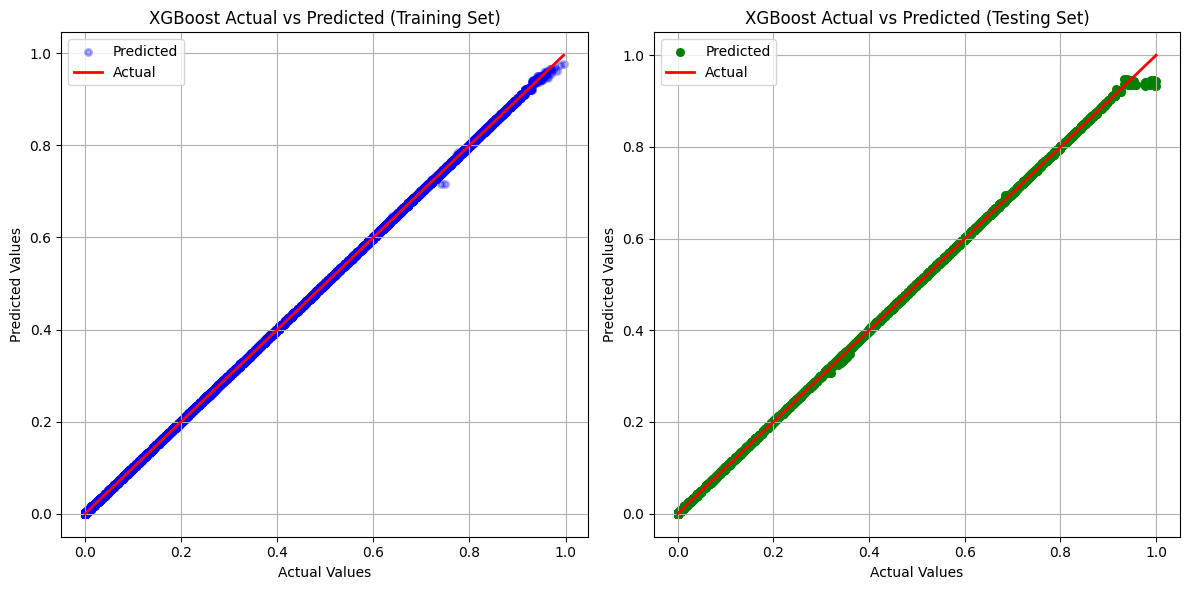

In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest Regressor
rfb = XGBRegressor()

# Initialize the Decision Tree Regressor

# Fit the model on the training data
rfb.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = rfb.predict(X_train)
y_test_pred = rfb.predict(X_test)

# Calculate performance metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for the training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train*100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test*100:.4f}%')

# Plot for Training set
plt.figure(figsize=(12, 6))

# Training set actual vs predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_train, y_train_pred, color='blue',lw=2, alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('XGBoost Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Plot for Testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(y_test, y_test_pred, color='green',lw=2, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('XGBoost Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## XGBoost Cross_Validation

Cross-validated R² scores (Training): [0.99997301 0.99998398 0.99998437 0.99998693 0.99998617]
Mean R² (Training): 99.9983%

Cross-validated R² scores (Testing): [0.99997414 0.99997919 0.99997324 0.99997433 0.99996864]
Mean R² (Testing): 99.9974%

Training Set Metrics:
Mean Absolute Error (MAE): 0.0005
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0009
R² Score: 99.9991%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0006
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0022
R² Score: 99.9930%


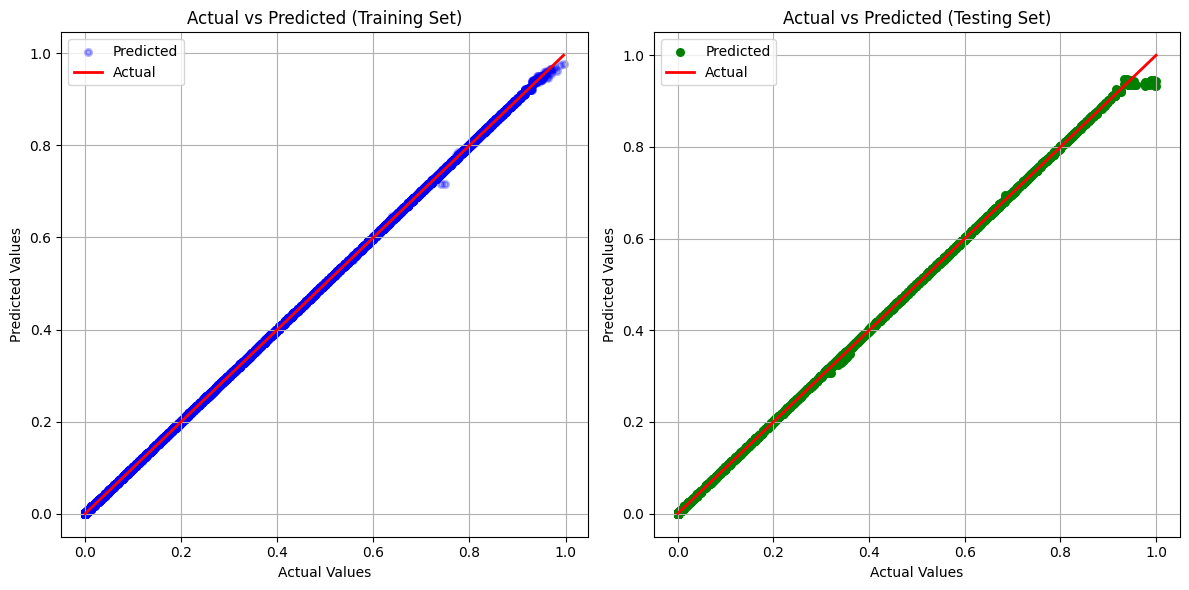

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBoost Regressor
rfb = XGBRegressor()

# Perform cross-validation with 5 splits (you can adjust the number of splits)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated R² scores for training and testing sets
r2_scores_train = cross_val_score(rfb, X_train, y_train, cv=cv, scoring='r2')
r2_scores_test = cross_val_score(rfb, X_test, y_test, cv=cv, scoring='r2')

# Fit the model on the training data
rfb.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = rfb.predict(X_train)
y_test_pred = rfb.predict(X_test)

# Calculate performance metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print cross-validation R² scores for training and testing sets
print(f'Cross-validated R² scores (Training): {r2_scores_train}')
print(f'Mean R² (Training): {np.mean(r2_scores_train)*100:.4f}%')

print(f'\nCross-validated R² scores (Testing): {r2_scores_test}')
print(f'Mean R² (Testing): {np.mean(r2_scores_test)*100:.4f}%')

# Print results for the training and test sets
print(f'\nTraining Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train*100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test*100:.4f}%')

# Plot for Training set
plt.figure(figsize=(12, 6))

# Training set actual vs predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_train, y_train_pred, color='blue', lw=2, alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Plot for Testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(y_test, y_test_pred, color='green', lw=2, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### kNN

### Decision Tree

Training Set Metrics:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R² Score: 100.0000%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0001
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0004
R² Score: 99.9997%


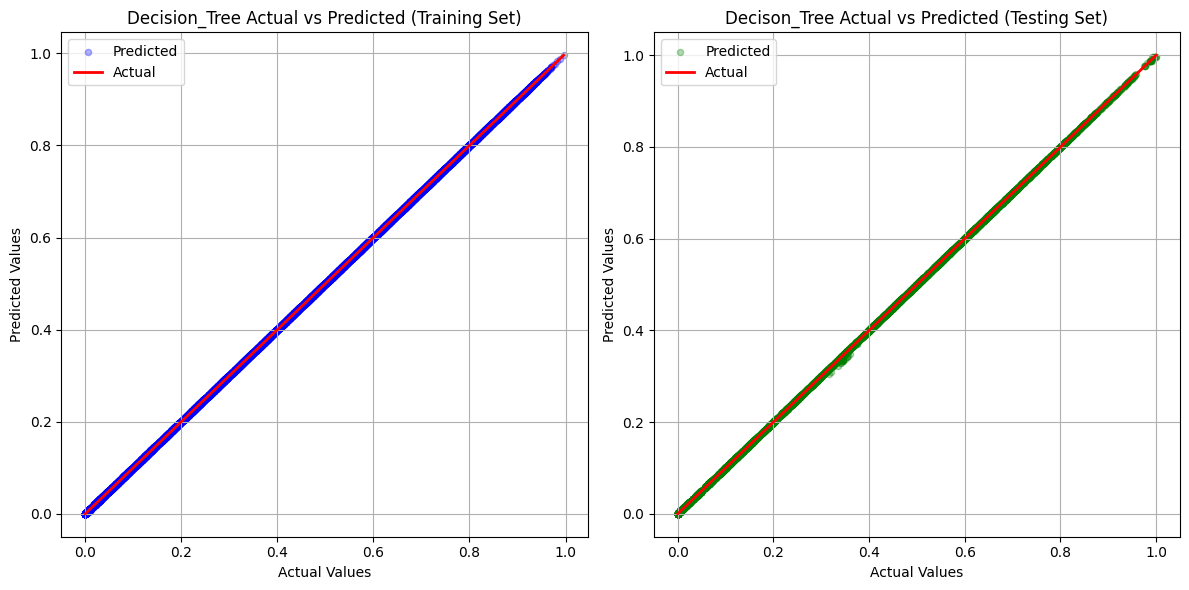

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
dr = DecisionTreeRegressor() 

# Fit the model on the training data
dr.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = dr.predict(X_train)
y_test_pred = dr.predict(X_test)

# Calculate performance metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for the training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train*100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test*100:.4f}%')

# Plot for Training set
plt.figure(figsize=(12, 6))

# Training set actual vs predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Decision_Tree Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Plot for Testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(y_test, y_test_pred, color='green', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Decison_Tree Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Cross-validated R² scores (Training): [0.99998985 0.99999912 0.99999923 0.9999946  0.99999853]
Mean R² (Training): 99.9996%

Cross-validated R² scores (Testing): [0.99999734 0.99999544 0.99999637 0.99999743 0.99998981]
Mean R² (Testing): 99.9995%

Training Set Metrics:
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R² Score: 100.0000%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0001
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0005
R² Score: 99.9996%


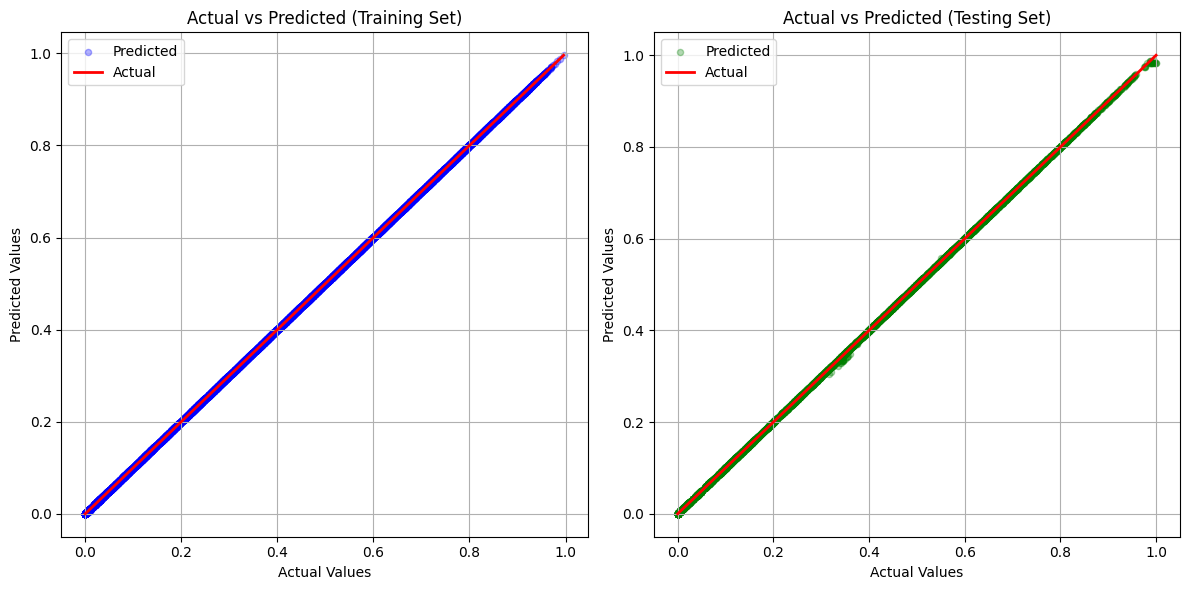

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
dr = DecisionTreeRegressor()

# Perform cross-validation with 5 splits (you can adjust the number of splits)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated R² scores for training and testing sets
r2_scores_train = cross_val_score(dr, X_train, y_train, cv=cv, scoring='r2')
r2_scores_test = cross_val_score(dr, X_test, y_test, cv=cv, scoring='r2')

# Fit the model on the training data
dr.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = dr.predict(X_train)
y_test_pred = dr.predict(X_test)

# Calculate performance metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print cross-validation R² scores for training and testing sets
print(f'Cross-validated R² scores (Training): {r2_scores_train}')
print(f'Mean R² (Training): {np.mean(r2_scores_train)*100:.4f}%')

print(f'\nCross-validated R² scores (Testing): {r2_scores_test}')
print(f'Mean R² (Testing): {np.mean(r2_scores_test)*100:.4f}%')

# Print results for the training and test sets
print(f'\nTraining Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.4f}')
print(f'Mean Squared Error (MSE): {mse_train:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.4f}')
print(f'R² Score: {r2_train*100:.4f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test*100:.4f}%')

# Plot for Training set
plt.figure(figsize=(12, 6))

# Training set actual vs predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Plot for Testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(y_test, y_test_pred, color='green', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Random Forest

Training Set Metrics:
Mean Absolute Error (MAE): 0
Mean Squared Error (MSE): 0
Root Mean Squared Error (RMSE): 0
R² Score: 100%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0001
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0005
R² Score: 99.9996%


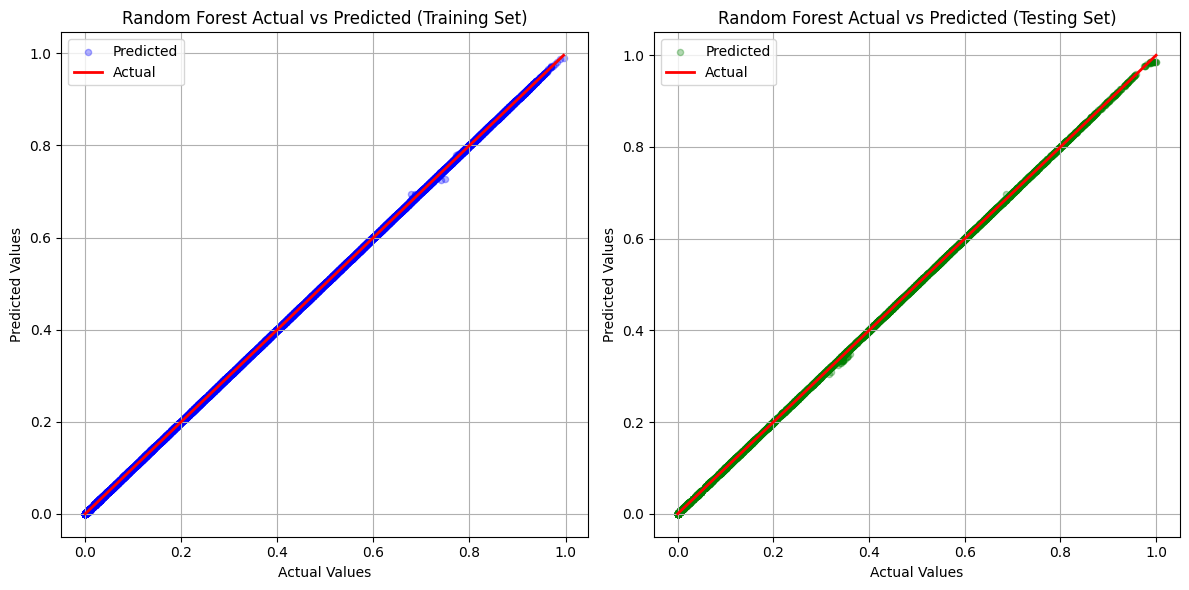

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Initialize the Decision Tree Regressor


# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate performance metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results for the training and test sets
print(f'Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.0f}')
print(f'Mean Squared Error (MSE): {mse_train:.0f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.0f}')
print(f'R² Score: {r2_train*100:.0f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test*100:.4f}%')

# Plot for Training set
plt.figure(figsize=(12, 6))

# Training set actual vs predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Random Forest Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Plot for Testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(y_test, y_test_pred, color='green', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Random Forest Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




Cross-validated R² scores (Training): [0.99999009 0.99999949 0.99999865 0.99999821 0.99999861]
Mean R² (Training): 99.9997%

Cross-validated R² scores (Testing): [0.99999844 0.99999688 0.99999769 0.99999869 0.9999985 ]
Mean R² (Testing): 99.9998%

Training Set Metrics:
Mean Absolute Error (MAE): 0
Mean Squared Error (MSE): 0
Root Mean Squared Error (RMSE): 0
R² Score: 100%

Testing Set Metrics:
Mean Absolute Error (MAE): 0.0001
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0005
R² Score: 99.9997%


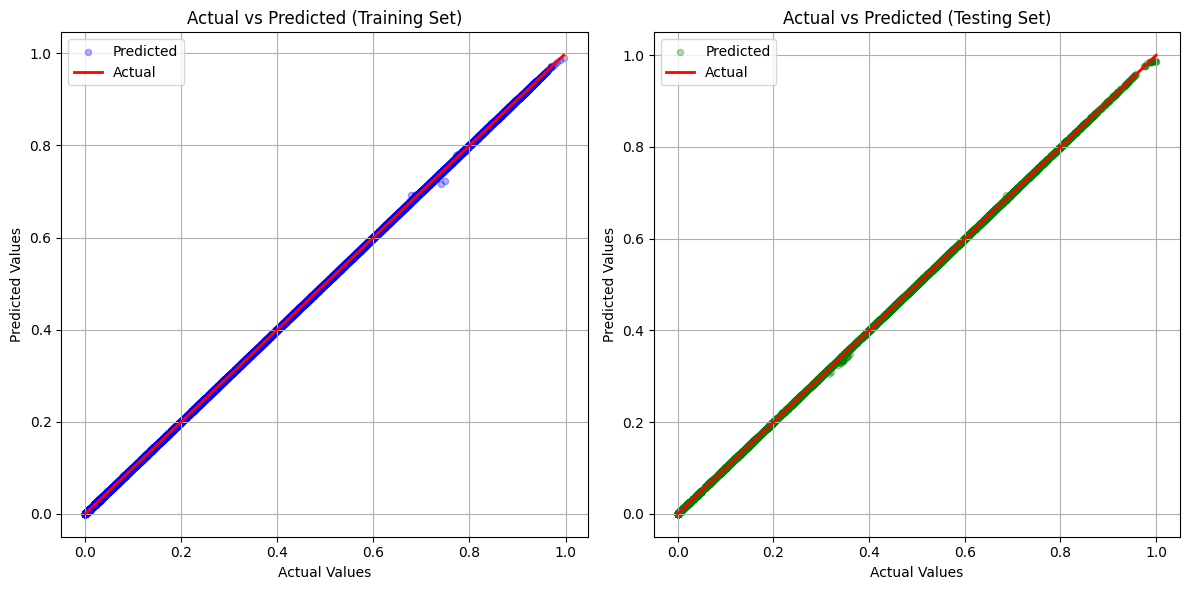

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Perform cross-validation with 5 splits (you can adjust the number of splits)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated R² scores for training and testing sets
r2_scores_train = cross_val_score(rf, X_train, y_train, cv=cv, scoring='r2')
r2_scores_test = cross_val_score(rf, X_test, y_test, cv=cv, scoring='r2')

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate performance metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate performance metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print cross-validation R² scores for training and testing sets
print(f'Cross-validated R² scores (Training): {r2_scores_train}')
print(f'Mean R² (Training): {np.mean(r2_scores_train)*100:.4f}%')

print(f'\nCross-validated R² scores (Testing): {r2_scores_test}')
print(f'Mean R² (Testing): {np.mean(r2_scores_test)*100:.4f}%')

# Print results for the training and test sets
print(f'\nTraining Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train:.0f}')
print(f'Mean Squared Error (MSE): {mse_train:.0f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.0f}')
print(f'R² Score: {r2_train*100:.0f}%')

print(f'\nTesting Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test:.4f}')
print(f'Mean Squared Error (MSE): {mse_test:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.4f}')
print(f'R² Score: {r2_test*100:.4f}%')

# Plot for Training set
plt.figure(figsize=(12, 6))

# Training set actual vs predicted
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Plot for Testing set
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(y_test, y_test_pred, color='green', alpha=0.3, label='Predicted', s=20)  # Smaller points, labeled 'Predicted'
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Actual')  # Perfect prediction line
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  # Add a legend
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [38]:
joblib.dump(rf, 'solar_energy_model.pkl')

['solar_energy_model.pkl']

## Using Scaling

## XGBoost with Scaling Method

## KNN With Scaling

## Decision Tree with Scaling

## Random Forest with Scaling

## Feature Reduction Using PCA

## Feature Reduction Using PCA For XGBoost

## Feature Reduction Using PCA For KNN

## Feature Reduction Using PCA For Decision Tree

## Feature Reduction Using  PCA For Random Forest